In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import HTML, display_html
import io
import base64

# This line will hide code by default when the notebook is exported as HTML
display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

# Volumes of Revolution

## Table of Contents

1. [Objective](#Objective)
2. [A Motivating Example](#MotivatingExample - A Sphere)
  1. [Creating a Riemann-like Approximation](#Sphere_Riemann)
  2. [Computing the Volume](#Sphere_Volume)
3. [Another Example: Decanter](#Decanter)
  1. [Computing the Volume](#Decanter_Volume)

<a id='Objective'></a>

## Objective

Suppose that we have a three-dimensional object, and that we would like the know the volume of that object. We could be a manufacturer that is trying to compute the cost of materials required to create the object, or we might be designing the object as a container, and would like to know the volume of the object. 

One class of three-dimensional objects is known as **volumes of revolution**. These shapes are produced by taking a 1-D line a revolving it about an axis to produce a closed shape. 

<a id='MotivatingExample'></a>

## A motivating example

To help us understand what exactly we want to measure, let us first consider a simple example for which we know the answer; let us start by computing the volume of a sphere.

How can we view a sphere as a volume of revolution? As the animation below illustrates, revolving the function $y = \sqrt{1-x^2}$ (a semi-circle) about the $x$-axis produces a sphere. The first frame shows the initial semi-circle curve, with subsequent frames showing the result of revolving the curve about the vertical axis.

In [2]:
## Sphere function
def f(t):
    return np.sqrt(1-t**2)
movie_name = "Sphere.mp4"

## Generate the data

Ns, Nt = 15,50

s = np.linspace(-1, 1, Ns)
t = np.linspace( 0, 2*np.pi, Nt)
sGrid, tGrid = np.meshgrid(s, t, indexing='ij')

y = sGrid
x = f(y)*np.cos(tGrid)
z = f(y)*np.sin(tGrid)

yline = s
xline = f(yline)

## Define the true solution
Ns2, Nt2 = 100, 100
s2 = np.linspace(-1, 1, Ns2)
t2 = np.linspace( 0, 2*np.pi, Nt2)
sGrid2, tGrid2 = np.meshgrid(s2, t2, indexing='ij')

y2 = sGrid2
x2 = f(y2)*np.cos(tGrid2)*(1.02)
z2 = f(y2)*np.sin(tGrid2)*(1.02)
##

X = np.zeros((2*Ns,Nt))
Y = np.zeros((2*Ns,Nt))
Z = np.zeros((2*Ns,Nt))

X[0,:] = x[0,:]
Y[0,:] = y[0,:]
Z[0,:] = z[0,:]

for ii in range(1,Ns):
    X[2*ii-1,:] = x[ii-1,:]
    X[2*ii,:]   = x[ii,:]
    Y[2*ii-1,:] = y[ii,:] - 1e-4
    Y[2*ii,:]   = y[ii,:] + 1e-4
    Z[2*ii-1,:] = z[ii-1,:]
    Z[2*ii,:]   = z[ii,:]

X[-1,:] = x[-1,:]
Y[-1,:] = y[-1,:]
Z[-1,:] = z[-1,:]



In [3]:
video = io.open(movie_name, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

How might we go about computing the area of this object?

In the case of regular integrals, $\int_{-1}^1\sqrt{1-x^2}dx$, for example, we saw that we could approximate the integral as the sum of a series of rectangles. We called this sum a Riemann Sum.

Can we apply a similar idea to computing volumes of revolution? In this case the vertical axis is ranging from $-1$ to $1$, so we will divide the sphere into multiple approximate pieces. In this case, however, instead of approximating using rectangles, we will use cylindrical disks. 

The figure below illustrates how the approximation might appear.

<IPython.core.display.Javascript object>


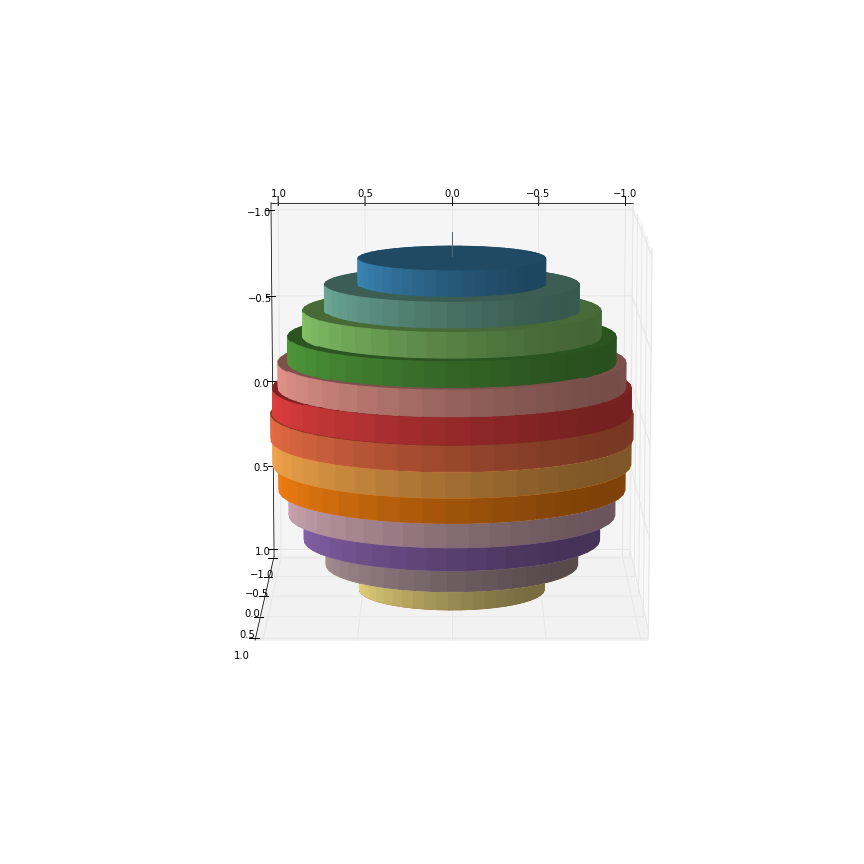

In [4]:
## Plotting

my_col  = cm.Paired((Y - Y.min())/(Y.max()-Y.min()))
my_col2 = cm.Paired((y2 - y2.min())/(y2.max()-y2.min()))

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# These turn on an outer 'shell'
#plot2 = ax.plot_surface(x2, y2, z2, rstride=10, cstride=10, facecolors=0*my_col2)
#plot2.set_edgecolors(np.array([0.,0.,0.,0.5]))

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=my_col)

## This turns on an 'outline' line
#ax.plot(xline, yline)

ax.view_init(100,90)
ax.set_ylim3d((-1,1))
plt.show()

<a id='Sphere_Riemann'></a>

## Creating a Riemann-type approximation

In Riemann sums, we needed to compute the area of each individual *rectangle*. In the case of volumes of revolution, we need to compute the area of each individual '*disk*'.

Now that we have constructed a cylindrical-disk approximation to the sphere, how might we go about approximating the volume of the full sphere?

In Riemann sums, we needed to compute the area of each individual *rectangle*. In the case of volumes of revolution, we need to compute the area of each individual '*disk*'.

The figure below highlights a single 'Riemann disk', for which we want to find the area.
We know that the volume of a cylinder is given by 
$$ V = \pi \cdot r^2 \cdot h $$
If the vertical coordinate is $z$, then the height is given by $h=\Delta z$ and the radius is approximated $r\approx f(z)$, where $f(z)=\sqrt{1-z^2}$ is the function that originally generated the sphere.

<IPython.core.display.Javascript object>


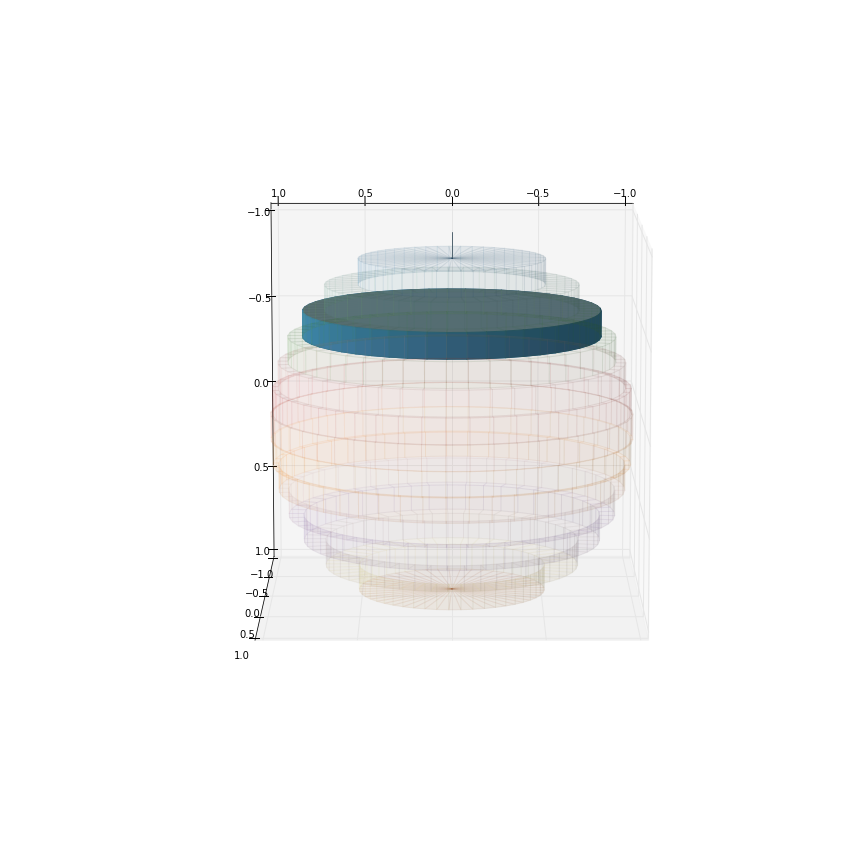

In [5]:
## Plotting
## Emphasize a specific 'washer'

my_col  = cm.Paired((Y - Y.min())/(Y.max()-Y.min()))
my_col3 = my_col.copy()
my_col2 = cm.Paired((y2 - y2.min())/(y2.max()-y2.min()))

my_col[:,:,-1] = 0.05

binSel = int(0.25*Ns)
dyPerBin = (Y.max() - Y.min())/Ns
cut1 = Y[2*binSel,0]
cut2 = Y[2*binSel+1,0]

sSel = np.array([cut1-1e-3, cut1, cut2, cut2+1e-3])
fSel = np.array([0, X[2*binSel,0], X[2*binSel+1,0], 0])
tSel = np.linspace( 0, 2*np.pi, Nt)
fGridSel, tGridSel = np.meshgrid(fSel, tSel, indexing='ij')
sGridSel, tGridSel = np.meshgrid(sSel, tSel, indexing='ij')

ySel = sGridSel
xSel = fGridSel*np.cos(tGridSel)
zSel = fGridSel*np.sin(tGridSel)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# These turn on an outer 'shell'
#plot2 = ax.plot_surface(x2, y2, z2, rstride=10, cstride=10, facecolors=0*my_col2)
#plot2.set_edgecolors(np.array([0.,0.,0.,0.5]))

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=my_col)
ax.plot_surface(xSel, ySel, zSel, rstride=1, cstride=1, facecolors=my_col3)

## This turns on an 'outline' line
#ax.plot(xline, yline)

ax.view_init(100,90)
ax.set_ylim3d((-1,1))

plt.show()

<a id='Sphere_Volume'></a>

### Computing the Volume

If we add the volume of each Riemann disk, then we would get something like

\begin{align*}
V_{\mathrm{sphere}} &\approx \sum_{i=0}^{N-1}\pi r_i^2 h_i  \\
&= \sum_{i=0}^{N-1}\pi (f(z))^2 \Delta z \\
&= \pi\cdot\underbrace{\Delta z\sum_{i=0}^{N-1} (f(z))^2}_{\text{Looks like integral}\text{of } (f(z))^2}
\end{align*}

If we consider the limit as $\Delta z\to0$, the we do indeed recover an integral form for the volume:
$$ V_{\mathrm{sphere}} = \pi\int_{-1}^{1}\left(f(z) \right)^2\,dz. $$

We can then compute the volume of the sphere as:

\begin{align*}
V_{\mathrm{sphere}} &= \pi\int_{-1}^{1}\left( \sqrt{1-z^2} \right)^2\,dz \\
&= \pi\int_{-1}^1 1 - z^2 \,dz \\
&= \pi \left[z - \frac{1}{3}z^3 \right]_{-1}^{1} \\
&= \pi \left[ \left( 1 - \frac{1}{3} \right) - \left(-1 + \frac{1}{3} \right) \right] \\
&= \pi\left(2 - \frac{2}{3} \right) \\
&= \frac{4}{3}\pi,
\end{align*}

which is the volume of a sphere with radius 1.

<a id='Decanter'></a>

## Example: Decanter

Let's take a look at another example:
$$ f(z) = -(z+1)\cdot(z-1)\cdot(z^2 + z + 0.3) $$

This may seem like a rather bizarre function, but by watching the animation below, which shows the revolution process, we see that it creates a shape similar to a decanter.

A designer of these objects might be interested in increasing the volume of the object in order to increase the amount of liquid that can be decanted..

In [6]:
## Decanter
def f(t):
    return -(t+1)*(t-1)*(t**2 + t + 0.3)
movie_name = "Decanter.mp4"

## Generate the data

Ns, Nt = 25,50

s = np.linspace(-1, 1, Ns)
t = np.linspace( 0, 2*np.pi, Nt)
sGrid, tGrid = np.meshgrid(s, t, indexing='ij')

y = sGrid
x = f(y)*np.cos(tGrid)
z = f(y)*np.sin(tGrid)

yline = s
xline = f(yline)

## Define the true solution
Ns2, Nt2 = 100, 100
s2 = np.linspace(-1, 1, Ns2)
t2 = np.linspace( 0, 2*np.pi, Nt2)
sGrid2, tGrid2 = np.meshgrid(s2, t2, indexing='ij')

y2 = sGrid2
x2 = f(y2)*np.cos(tGrid2)*(1.02)
z2 = f(y2)*np.sin(tGrid2)*(1.02)
##

X = np.zeros((2*Ns,Nt))
Y = np.zeros((2*Ns,Nt))
Z = np.zeros((2*Ns,Nt))

X[0,:] = x[0,:]
Y[0,:] = y[0,:]
Z[0,:] = z[0,:]

for ii in range(1,Ns):
    X[2*ii-1,:] = x[ii-1,:]
    X[2*ii,:]   = x[ii,:]
    Y[2*ii-1,:] = y[ii,:] - 1e-4
    Y[2*ii,:]   = y[ii,:] + 1e-4
    Z[2*ii-1,:] = z[ii-1,:]
    Z[2*ii,:]   = z[ii,:]

X[-1,:] = x[-1,:]
Y[-1,:] = y[-1,:]
Z[-1,:] = z[-1,:]




In [7]:
video = io.open(movie_name, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

<IPython.core.display.Javascript object>


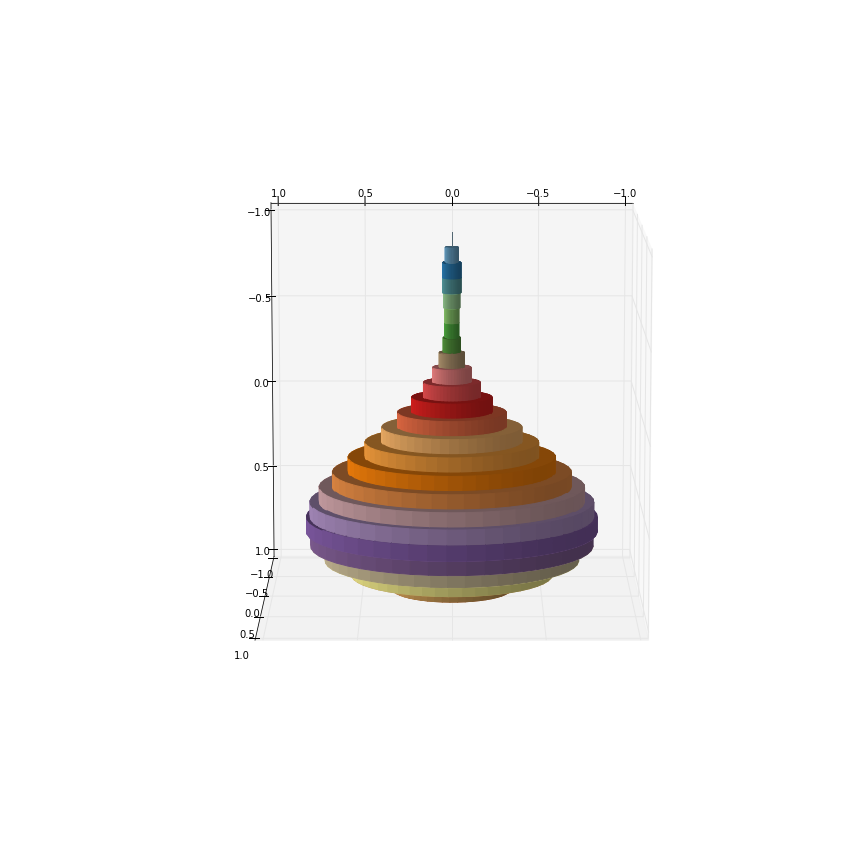

In [8]:
## Plotting

my_col  = cm.Paired((Y - Y.min())/(Y.max()-Y.min()))
my_col2 = cm.Paired((y2 - y2.min())/(y2.max()-y2.min()))

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# These turn on an outer 'shell'
#plot2 = ax.plot_surface(x2, y2, z2, rstride=10, cstride=10, facecolors=0*my_col2)
#plot2.set_edgecolors(np.array([0.,0.,0.,0.5]))

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=my_col)

## This turns on an 'outline' line
#ax.plot(xline, yline)

ax.view_init(100,90)
ax.set_ylim3d((-1,1))
plt.show()

<IPython.core.display.Javascript object>


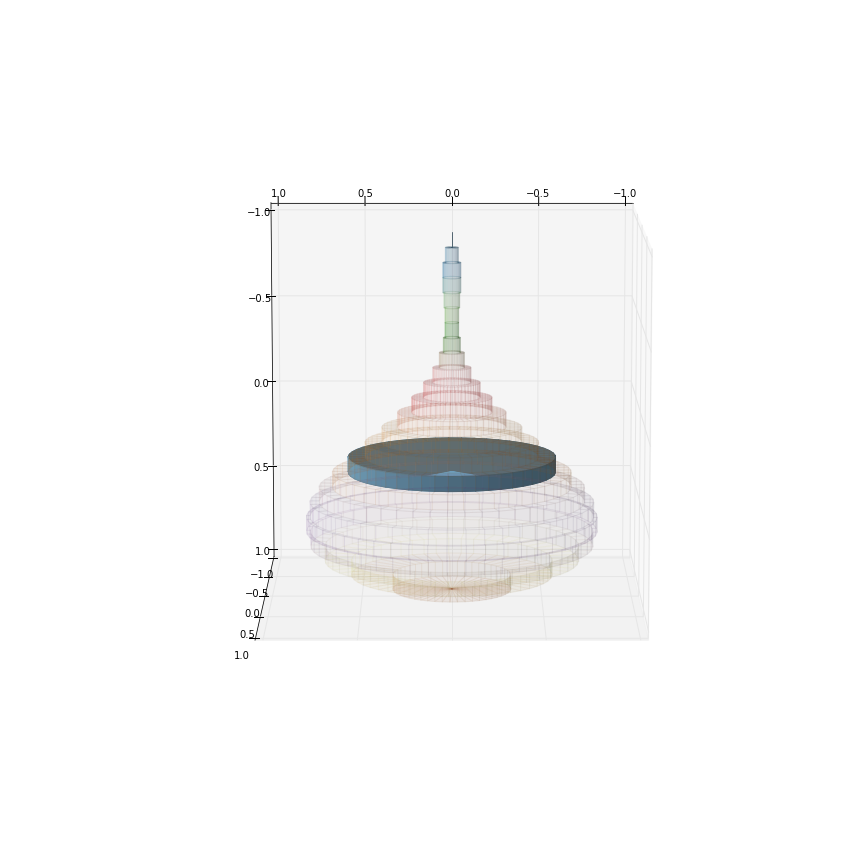

In [9]:
## Plotting
## Emphasize a specific 'washer'

my_col  = cm.Paired((Y - Y.min())/(Y.max()-Y.min()))
my_col3 = my_col.copy()
my_col2 = cm.Paired((y2 - y2.min())/(y2.max()-y2.min()))

my_col[:,:,-1] = 0.05

binSel = int(0.6*Ns)
dyPerBin = (Y.max() - Y.min())/Ns
cut1 = Y[2*binSel,0]
cut2 = Y[2*binSel+1,0]

sSel = np.array([cut1-1e-3, cut1, cut2, cut2+1e-3])
fSel = np.array([0, X[2*binSel,0], X[2*binSel+1,0], 0])
tSel = np.linspace( 0, 2*np.pi, Nt)
fGridSel, tGridSel = np.meshgrid(fSel, tSel, indexing='ij')
sGridSel, tGridSel = np.meshgrid(sSel, tSel, indexing='ij')

ySel = sGridSel
xSel = fGridSel*np.cos(tGridSel)
zSel = fGridSel*np.sin(tGridSel)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# These turn on an outer 'shell'
#plot2 = ax.plot_surface(x2, y2, z2, rstride=10, cstride=10, facecolors=0*my_col2)
#plot2.set_edgecolors(np.array([0.,0.,0.,0.5]))

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=my_col)
ax.plot_surface(xSel, ySel, zSel, rstride=1, cstride=1, facecolors=my_col3)

## This turns on an 'outline' line
#ax.plot(xline, yline)

ax.view_init(100,90)
ax.set_ylim3d((-1,1))

plt.show()

<a id='Decanter_Volume'></a>

### Computing the Volume

Once again, we approximate the full shape as being the sum of a series of Riemann disks. The volume of each disk is given by

$$ V_{\mathrm{disk}} = \pi r^2 \Delta z = \pi (f(z))^2\Delta z $$

The volume of the full object is then approximated by the sum of the volumes of each Riemann disk.

If we add the volume of each Riemann disk, then we would get something like

\begin{align*}
V_{\text{decanter}} &\approx \sum_{i=0}^{N-1}\pi r_i^2 h_i  \\
&= \sum_{i=0}^{N-1}\pi (f(z))^2 \Delta z \\
&= \pi\cdot\Delta z\sum_{i=0}^{N-1} (-(z+1)\cdot(z-1)\cdot(z^2 + z + 0.3))^2
\end{align*}

If we consider the limit as $\Delta z\to0$, the we do indeed recover an integral form for the volume:
$$ V_{\mathrm{decanter}} = \pi\int_{-1}^{1}\left(f(z) \right)^2\,dz. $$

We can then compute the volume of the sphere as:

\begin{align*}
V_{\mathrm{decanter}} &= \pi\int_{-1}^{1}\left( -(z+1)\cdot(z-1)\cdot(z^2 + z + 0.3) \right)^2\,dz \\
&= \pi\int_{-1}^1 \left( z^8 + 0.4z^6 - 3.4z^5 - 2.11z^4  + 0.8z^3 + 1.42z^2 + 0.6z + 0.09\right) \,dz \\
&= \pi \left[ \frac{1}{9}z^9 + \frac{0.4}{7}z^7 - \frac{3.4}{6}z^6 - \frac{2.11}{5}z^5  + \frac{0.8}{4}z^4 + \frac{1.42}{3}z^3 + \frac{0.6}{2}z^2 + 0.09z\right]_{-1}^1 \\
&\approx 2.076443145
\end{align*}
